<a href="https://colab.research.google.com/github/AsthmaticDonkey/Thesis/blob/master/ORBTest1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
pip install pydicom

     |████████████████████████████████| 7.1MB 9.0MB/s 


In [0]:
import numpy as np
from matplotlib import pyplot as plt, cm
from __future__ import division
import pydicom as DCM
import cv2
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt, cm
import numpy as np
import os
import nibabel as nib
%matplotlib inline

In [0]:
for inum in range(0, dicom_image_file_0.pixel_array.shape[0]):
  img1= dicom_image_file_0.pixel_array[inum]
  image2 = plt.imshow(img1)
  plt.savefig('/content/drive/My Drive/ThesisData/body1/'+str(inum)+'.png')


In [0]:
dicom_image_file_0 = DCM.read_file('/content/drive/My Drive/ThesisData/Body1.dcm')

img= dicom_image_file_0.pixel_array[350]


/usr/local/lib/python3.6/dist-packages/pydicom/filereader.py:313: UserWarning: Expected explicit VR, but found implicit VR - using implicit VR for reading
  warnings.warn(message, UserWarning)


In [0]:
dir(dicom_image_file_0)

['AccessionNumber',
 'AcquisitionDate',
 'AcquisitionNumber',
 'AcquisitionTime',
 'BitsAllocated',
 'BitsStored',
 'BodyPartExamined',
 'Columns',
 'ContentDate',
 'ContentTime',
 'CorrectedImage',
 'CountsAccumulated',
 'DerivationDescription',
 'DetectorInformationSequence',
 'EnergyWindowInformationSequence',
 'FrameIncrementPointer',
 'FrameOfReferenceUID',
 'HighBit',
 'ImageComments',
 'ImageType',
 'ImagesInAcquisition',
 'InstanceCreationDate',
 'InstanceCreationTime',
 'InstanceCreatorUID',
 'InstanceNumber',
 'InstitutionName',
 'Manufacturer',
 'Modality',
 'NumberOfDetectors',
 'NumberOfEnergyWindows',
 'NumberOfFrames',
 'NumberOfRotations',
 'NumberOfSlices',
 'OperatorsName',
 'PatientBirthDate',
 'PatientBirthTime',
 'PatientGantryRelationshipCodeSequence',
 'PatientID',
 'PatientName',
 'PatientOrientationCodeSequence',
 'PatientPosition',
 'PatientSex',
 'PatientSize',
 'PatientWeight',
 'PhotometricInterpretation',
 'PixelData',
 'PixelRepresentation',
 'PixelSpacin

In [0]:
image1 = cv2.imread('/content/drive/My Drive/ThesisData/test.png')

# Convert the training image to RGB

training_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Convert the training image to gray scale
training_gray = cv2.cvtColor(training_image, cv2.COLOR_RGB2GRAY)

# Create test image by adding Scale Invariance and Rotational Invariance
test_image = cv2.pyrDown(training_image)
test_image = cv2.pyrDown(test_image)
num_rows, num_cols = test_image.shape[:2]

rotation_matrix = cv2.getRotationMatrix2D((num_cols/2, num_rows/2), 30, 1)
test_image = cv2.warpAffine(test_image, rotation_matrix, (num_cols, num_rows))

test_gray = cv2.cvtColor(test_image, cv2.COLOR_RGB2GRAY)

# Display traning image and testing image
fx, plots = plt.subplots(1, 2, figsize=(20,10))

plots[0].set_title("Training Image")
plots[0].imshow(training_image)

plots[1].set_title("Testing Image")
plots[1].imshow(test_image)

error: ignored

Number of Keypoints Detected In The Training Image:  445
Number of Keypoints Detected In The Query Image:  6


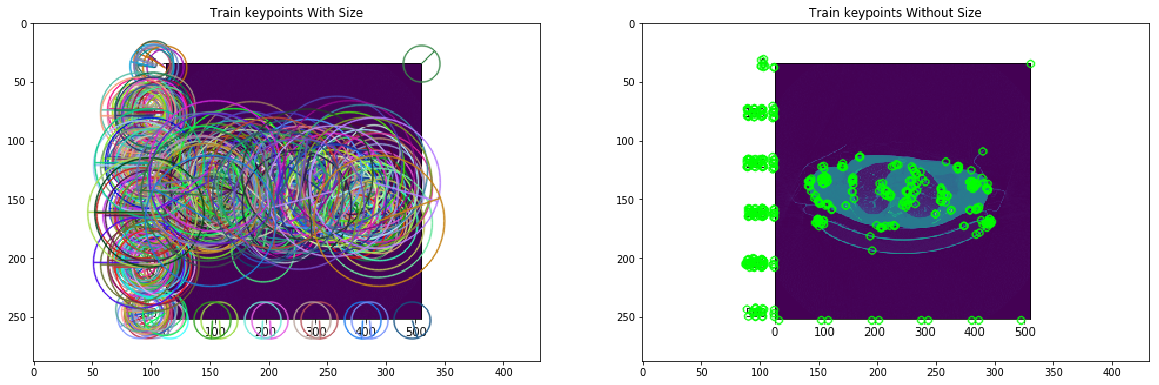

In [0]:

orb = cv2.ORB_create()

train_keypoints, train_descriptor = orb.detectAndCompute(training_gray, None)
test_keypoints, test_descriptor = orb.detectAndCompute(test_gray, None)

keypoints_without_size = np.copy(training_image)
keypoints_with_size = np.copy(training_image)

cv2.drawKeypoints(training_image, train_keypoints, keypoints_without_size, color = (0, 255, 0))

cv2.drawKeypoints(training_image, train_keypoints, keypoints_with_size, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display image with and without keypoints size
fx, plots = plt.subplots(1, 2, figsize=(20,10))

plots[0].set_title("Train keypoints With Size")
plots[0].imshow(keypoints_with_size, cmap='gray')

plots[1].set_title("Train keypoints Without Size")
plots[1].imshow(keypoints_without_size, cmap='gray')

# Print the number of keypoints detected in the training image
print("Number of Keypoints Detected In The Training Image: ", len(train_keypoints))

# Print the number of keypoints detected in the query image
print("Number of Keypoints Detected In The Query Image: ", len(test_keypoints))

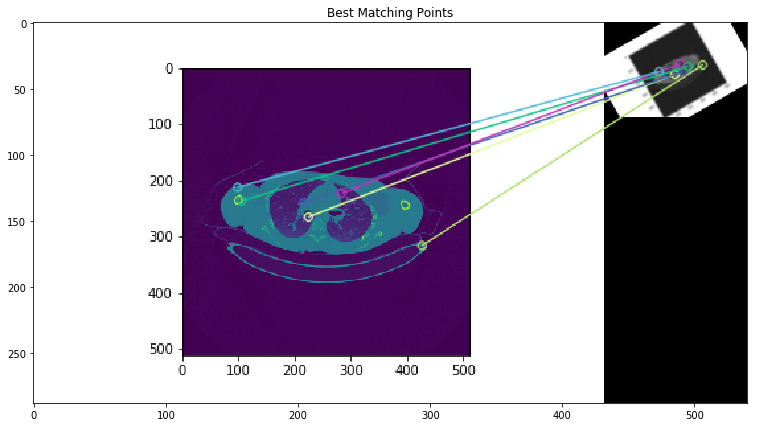


Number of Matching Keypoints Between The Training and Query Images:  6


In [0]:
# Create a Brute Force Matcher object.
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)

# Perform the matching between the ORB descriptors of the training image and the test image
matches = bf.match(train_descriptor, test_descriptor)

# The matches with shorter distance are the ones we want.
matches = sorted(matches, key = lambda x : x.distance)

result = cv2.drawMatches(training_image, train_keypoints, test_gray, test_keypoints, matches, test_gray, flags = 2)

# Display the best matching points
plt.rcParams['figure.figsize'] = [14.0, 7.0]
plt.title('Best Matching Points')
plt.imshow(result)
plt.show()

# Print total number of matching points between the training and query images
print("\nNumber of Matching Keypoints Between The Training and Query Images: ", len(matches))